In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
## read df
df = pd.read_csv('train.csv')
## gather preliminary data 
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [22]:
## make sure there is no null data
print(df.dropna(thresh=1).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [27]:
## dataset said that there are columns that are catogorical, plot those values and see
## try to get only the integer columns
columns = df.columns
countDict = {}
for column in columns:
    if type(df[column][0]) == np.int64:
        countDict[column] = Counter()
countDict

{'id': Counter(),
 'ps_calc_04': Counter(),
 'ps_calc_05': Counter(),
 'ps_calc_06': Counter(),
 'ps_calc_07': Counter(),
 'ps_calc_08': Counter(),
 'ps_calc_09': Counter(),
 'ps_calc_10': Counter(),
 'ps_calc_11': Counter(),
 'ps_calc_12': Counter(),
 'ps_calc_13': Counter(),
 'ps_calc_14': Counter(),
 'ps_calc_15_bin': Counter(),
 'ps_calc_16_bin': Counter(),
 'ps_calc_17_bin': Counter(),
 'ps_calc_18_bin': Counter(),
 'ps_calc_19_bin': Counter(),
 'ps_calc_20_bin': Counter(),
 'ps_car_01_cat': Counter(),
 'ps_car_02_cat': Counter(),
 'ps_car_03_cat': Counter(),
 'ps_car_04_cat': Counter(),
 'ps_car_05_cat': Counter(),
 'ps_car_06_cat': Counter(),
 'ps_car_07_cat': Counter(),
 'ps_car_08_cat': Counter(),
 'ps_car_09_cat': Counter(),
 'ps_car_10_cat': Counter(),
 'ps_car_11': Counter(),
 'ps_car_11_cat': Counter(),
 'ps_ind_01': Counter(),
 'ps_ind_02_cat': Counter(),
 'ps_ind_03': Counter(),
 'ps_ind_04_cat': Counter(),
 'ps_ind_05_cat': Counter(),
 'ps_ind_06_bin': Counter(),
 'ps_i

In [28]:
## id and target are not attributes that we want to analyze
del countDict['id']
del countDict['target']
countDict

{'ps_calc_04': Counter(),
 'ps_calc_05': Counter(),
 'ps_calc_06': Counter(),
 'ps_calc_07': Counter(),
 'ps_calc_08': Counter(),
 'ps_calc_09': Counter(),
 'ps_calc_10': Counter(),
 'ps_calc_11': Counter(),
 'ps_calc_12': Counter(),
 'ps_calc_13': Counter(),
 'ps_calc_14': Counter(),
 'ps_calc_15_bin': Counter(),
 'ps_calc_16_bin': Counter(),
 'ps_calc_17_bin': Counter(),
 'ps_calc_18_bin': Counter(),
 'ps_calc_19_bin': Counter(),
 'ps_calc_20_bin': Counter(),
 'ps_car_01_cat': Counter(),
 'ps_car_02_cat': Counter(),
 'ps_car_03_cat': Counter(),
 'ps_car_04_cat': Counter(),
 'ps_car_05_cat': Counter(),
 'ps_car_06_cat': Counter(),
 'ps_car_07_cat': Counter(),
 'ps_car_08_cat': Counter(),
 'ps_car_09_cat': Counter(),
 'ps_car_10_cat': Counter(),
 'ps_car_11': Counter(),
 'ps_car_11_cat': Counter(),
 'ps_ind_01': Counter(),
 'ps_ind_02_cat': Counter(),
 'ps_ind_03': Counter(),
 'ps_ind_04_cat': Counter(),
 'ps_ind_05_cat': Counter(),
 'ps_ind_06_bin': Counter(),
 'ps_ind_07_bin': Counte

In [43]:
for column in countDict:
    for ele in df[column]:
        if ele in countDict[column]:
            countDict[column][ele] = countDict[column][ele] + 1
        else:
            countDict[column][ele] = 1
countDict

{'ps_calc_04': Counter({0: 23912,
          1: 108013,
          2: 193983,
          3: 175515,
          4: 79606,
          5: 14193}),
 'ps_calc_05': Counter({0: 61226,
          1: 170864,
          2: 195165,
          3: 119192,
          4: 40683,
          5: 7534,
          6: 558}),
 'ps_calc_06': Counter({0: 1,
          1: 6,
          2: 132,
          3: 1199,
          4: 6705,
          5: 26613,
          6: 73479,
          7: 139774,
          8: 175018,
          9: 129209,
          10: 43086}),
 'ps_calc_07': Counter({0: 15290,
          1: 69314,
          2: 139103,
          3: 162416,
          4: 122039,
          5: 61706,
          6: 20403,
          7: 4381,
          8: 547,
          9: 23}),
 'ps_calc_08': Counter({2: 10,
          3: 90,
          4: 842,
          5: 4469,
          6: 17184,
          7: 49567,
          8: 102948,
          9: 151748,
          10: 151332,
          11: 91640,
          12: 25392}),
 'ps_calc_09': Counter({0: 3447

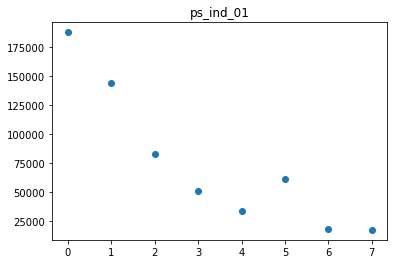

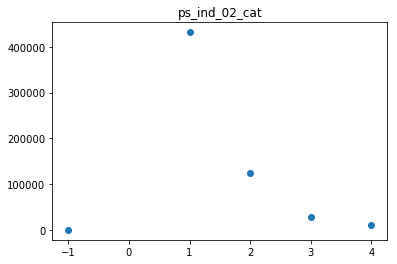

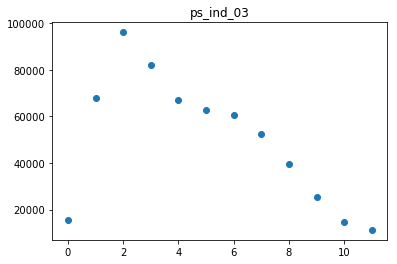

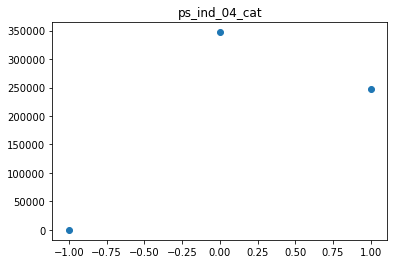

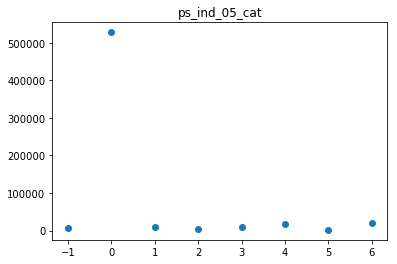

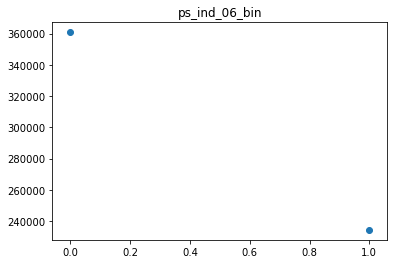

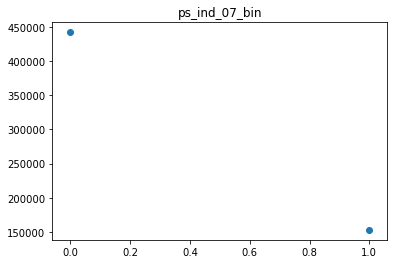

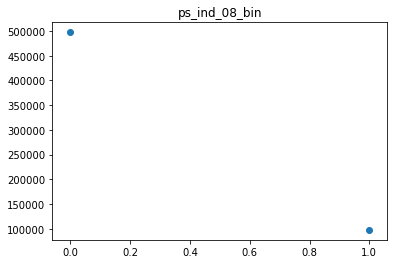

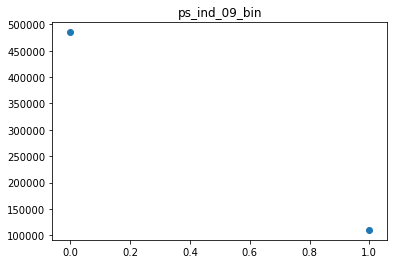

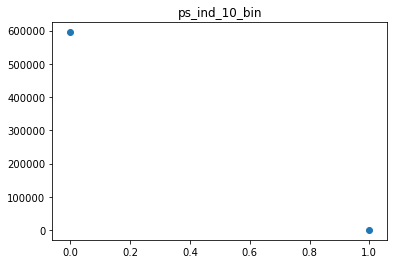

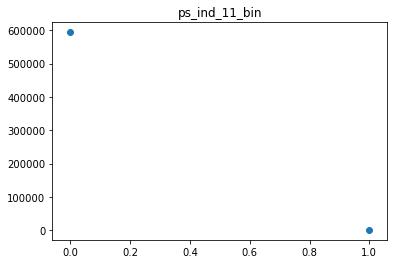

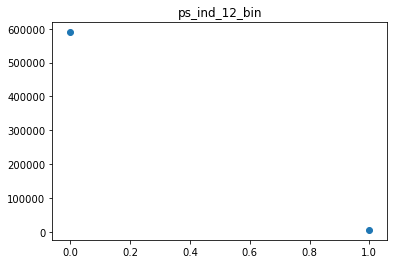

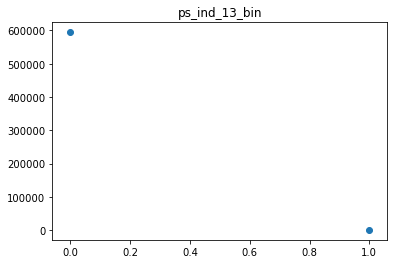

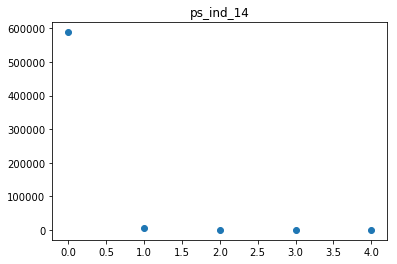

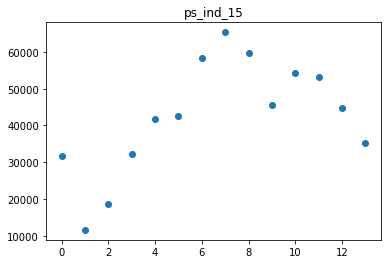

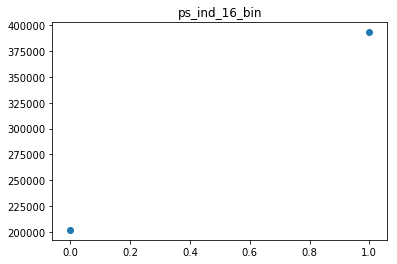

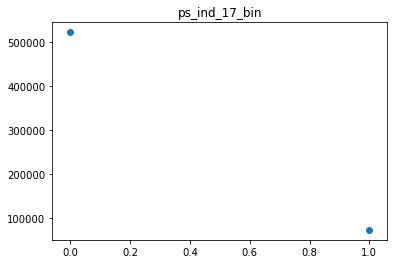

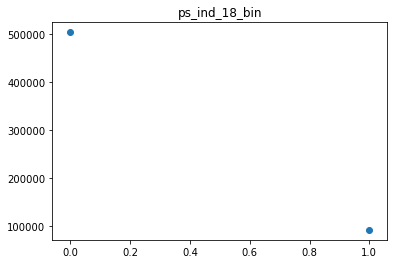

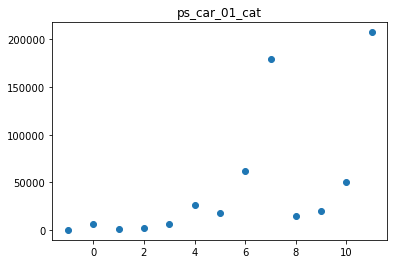

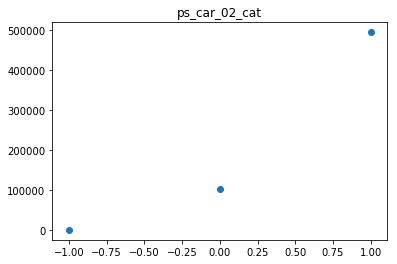

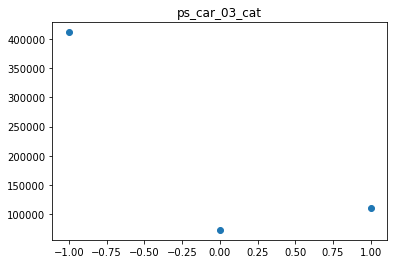

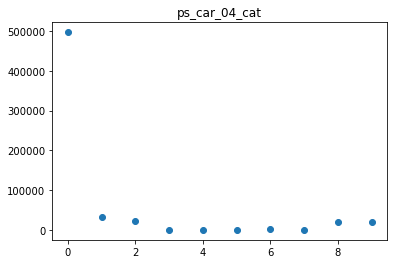

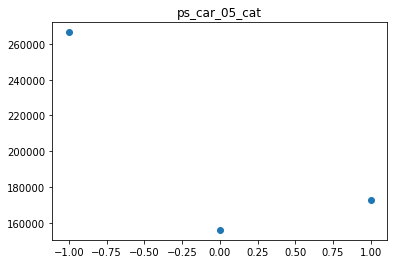

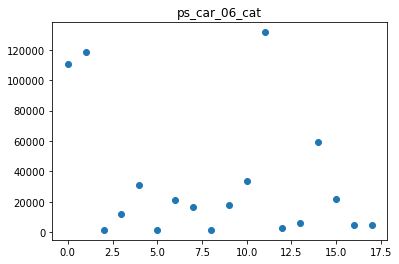

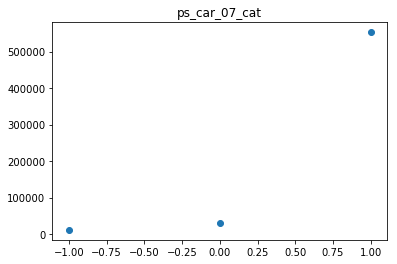

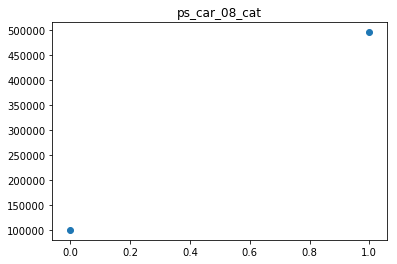

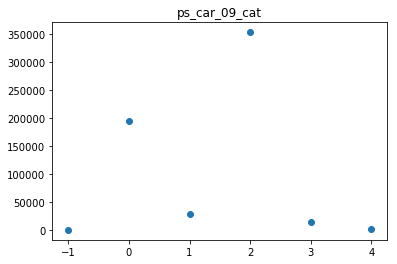

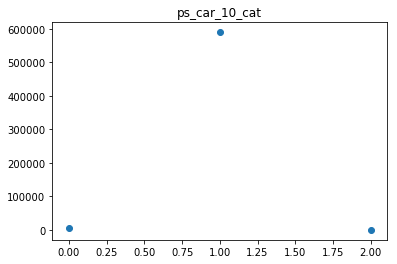

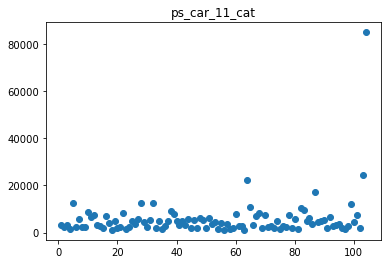

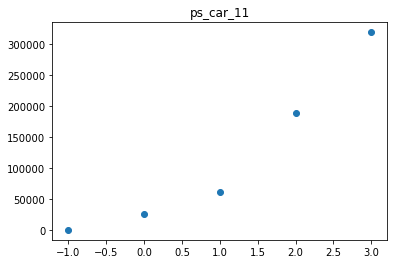

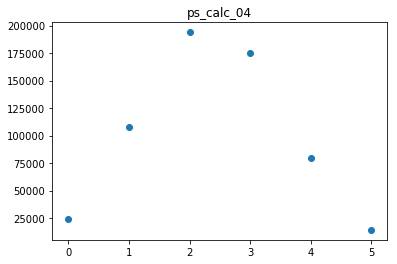

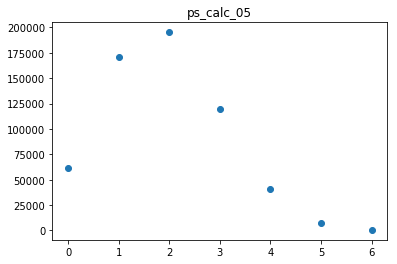

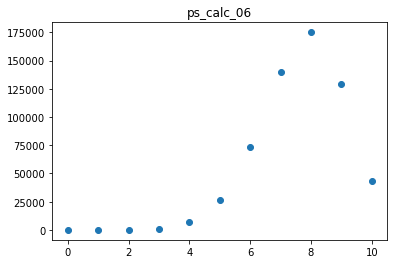

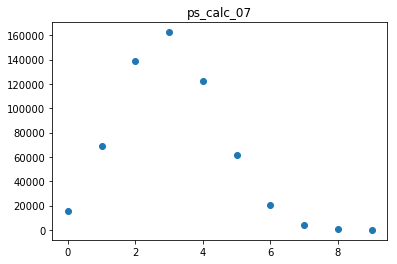

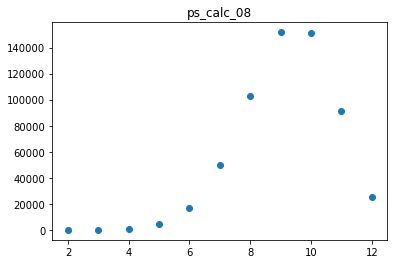

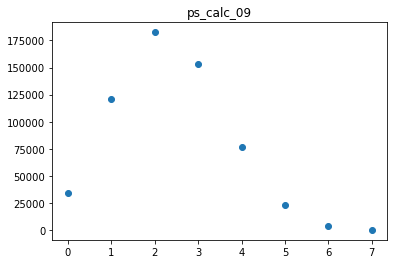

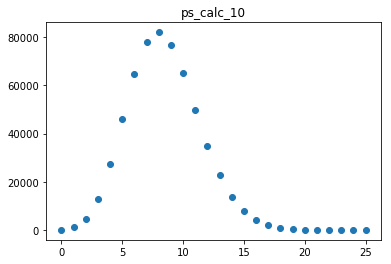

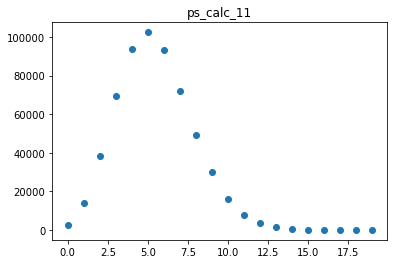

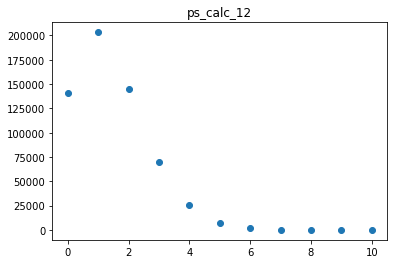

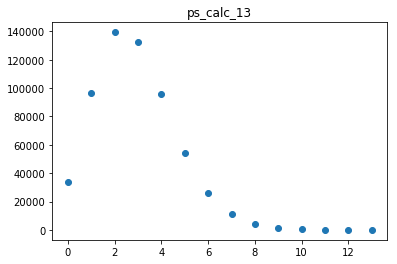

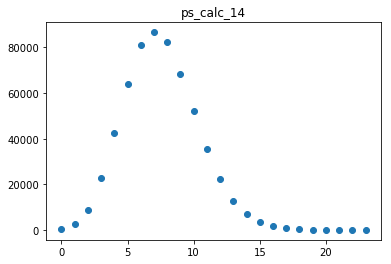

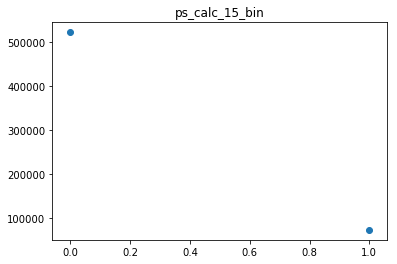

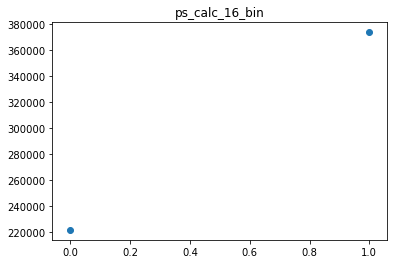

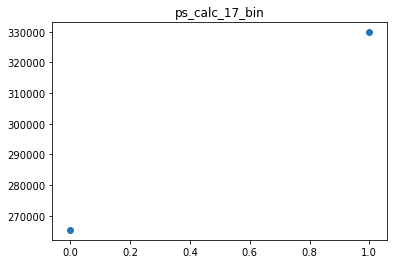

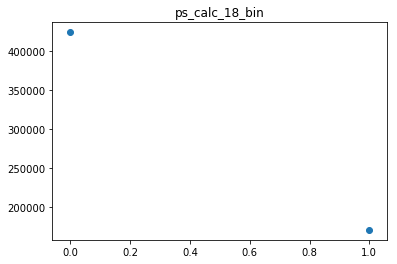

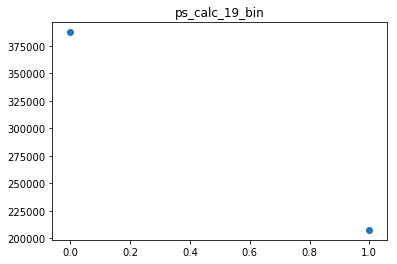

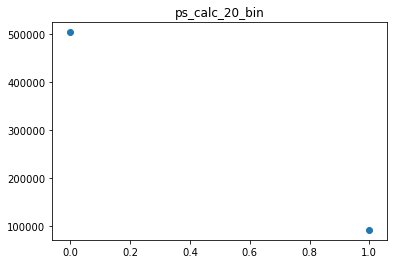

In [45]:
for key in countDict:
    plt.title(key)
    plt.scatter(list(countDict[key].keys()), list(countDict[key].values()))
    plt.show()

In [49]:
## reuse the code above to create a function that will take a csv file and do the same analyst
def analyzeData(csv):
    df = pd.read_csv(csv)
    df.head()
    df.shape
    df.info()
    print(df.dropna(thresh=1).info())
    columns = df.columns
    countDict = {}
    for column in columns:
        if type(df[column][0]) == np.int64:
            countDict[column] = Counter()
    countDict
    if 'id' in countDict:
        del countDict['id']
    if 'target' in countDict:
        del countDict['target']
    countDict
    for column in countDict:
        for ele in df[column]:
            if ele in countDict[column]:
                countDict[column][ele] = countDict[column][ele] + 1
            else:
                countDict[column][ele] = 1
    countDict
    for key in countDict:
        plt.title(key)
        plt.scatter(list(countDict[key].keys()), list(countDict[key].values()))
        plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

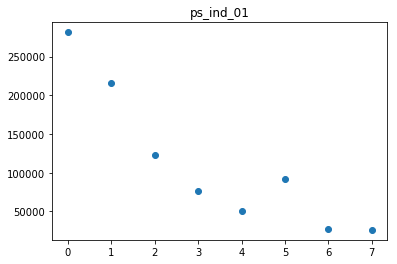

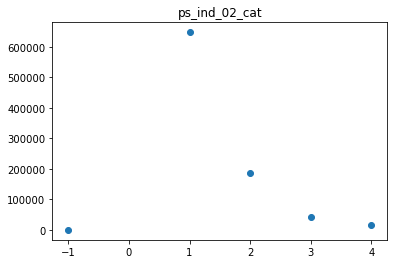

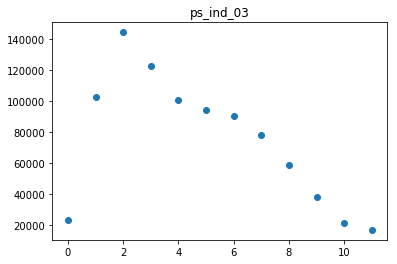

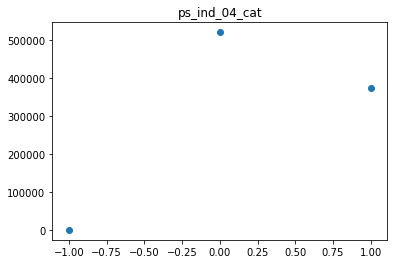

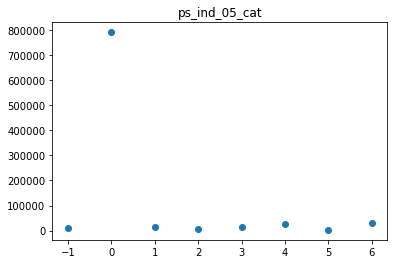

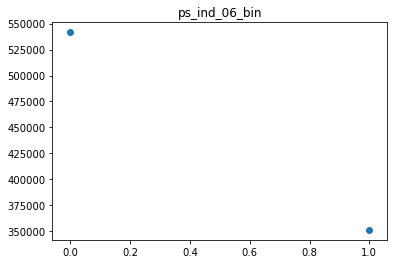

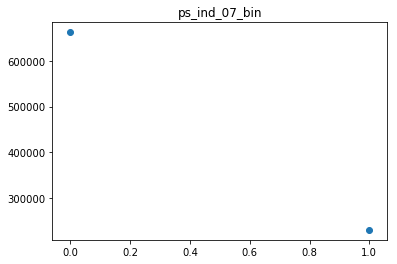

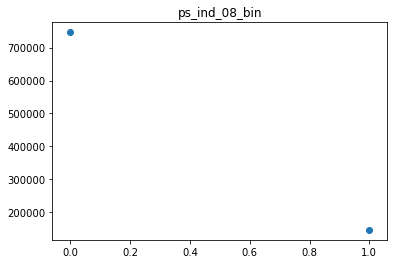

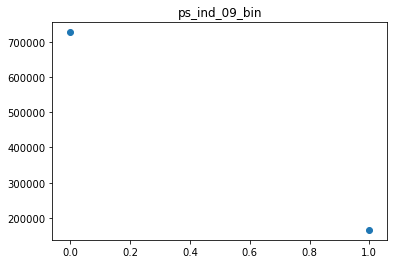

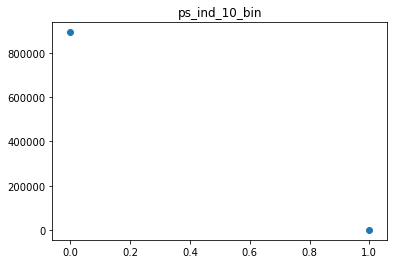

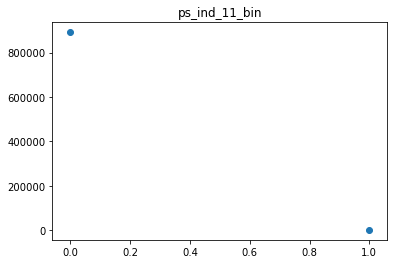

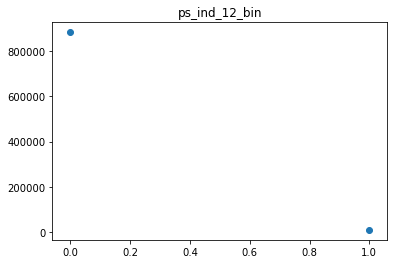

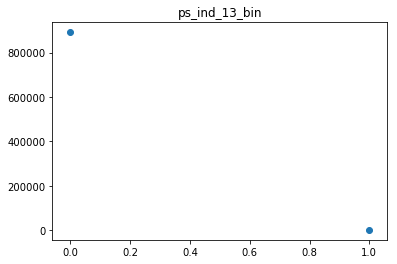

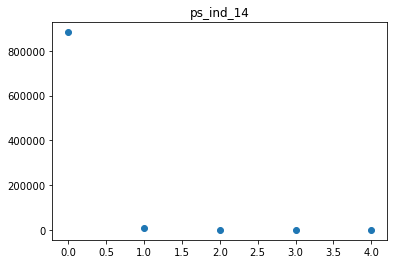

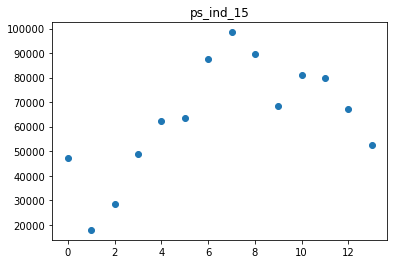

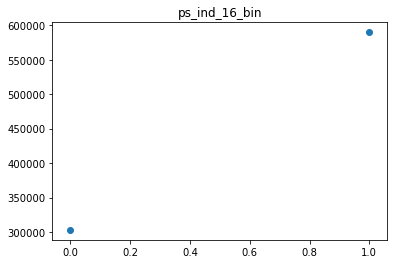

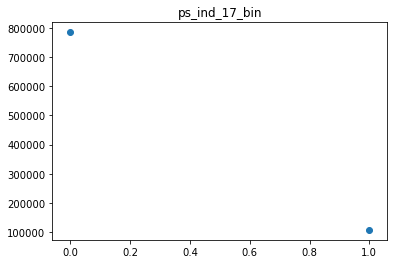

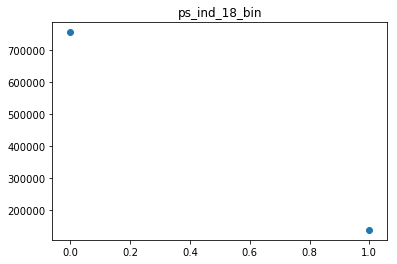

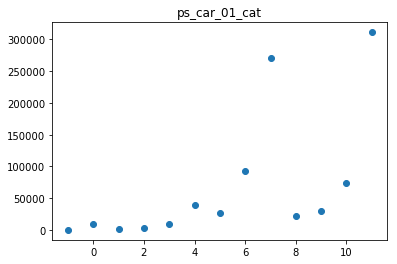

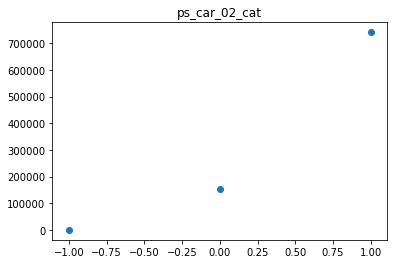

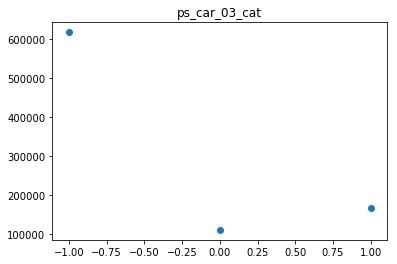

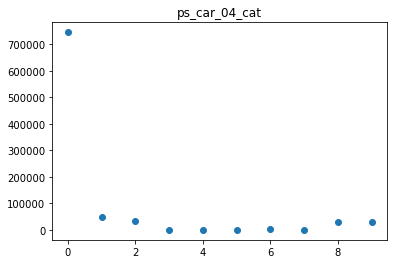

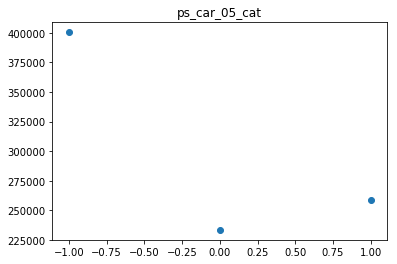

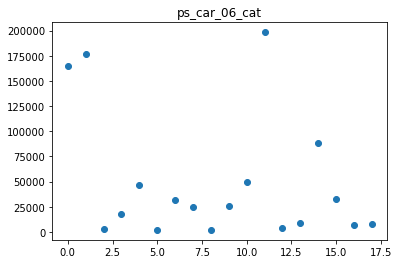

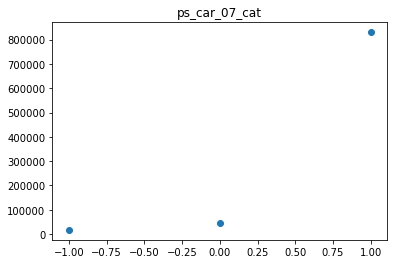

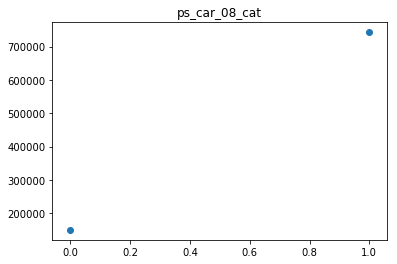

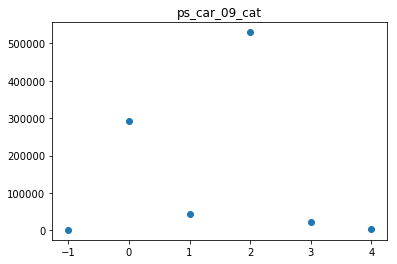

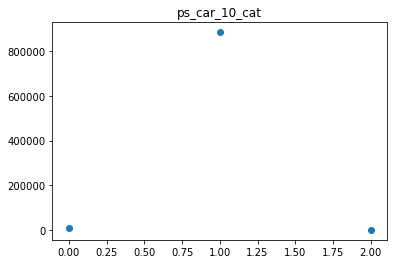

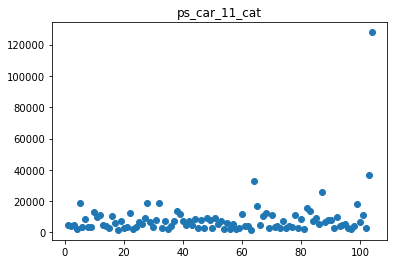

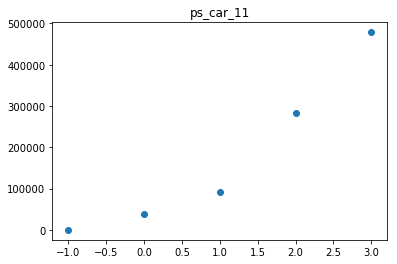

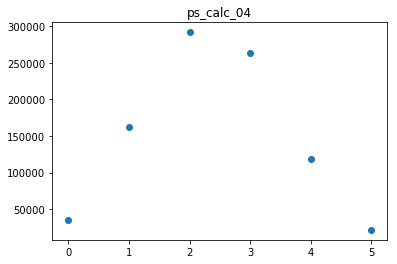

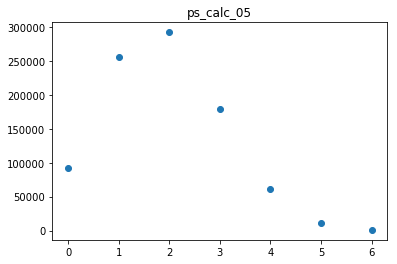

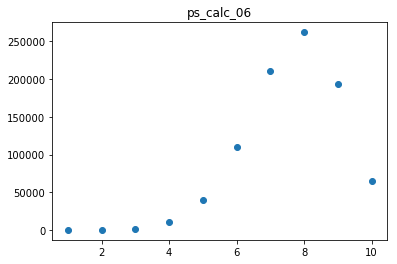

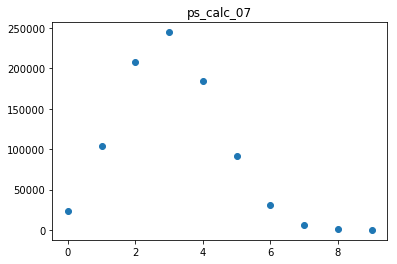

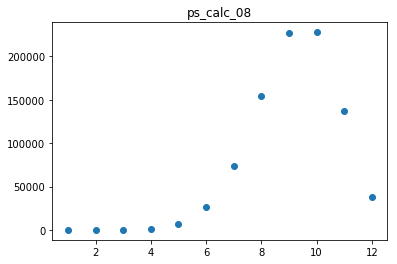

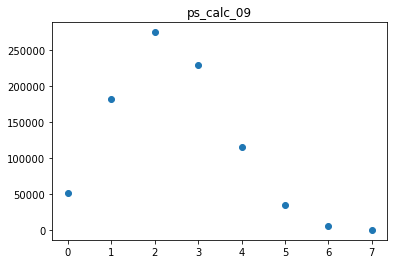

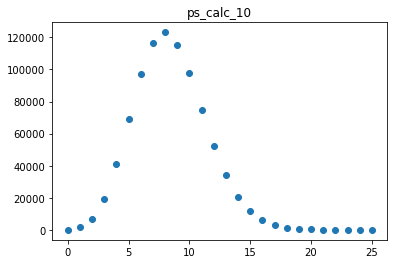

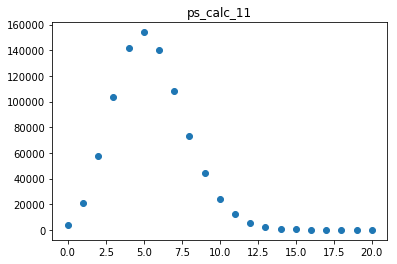

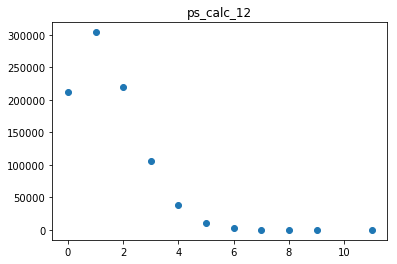

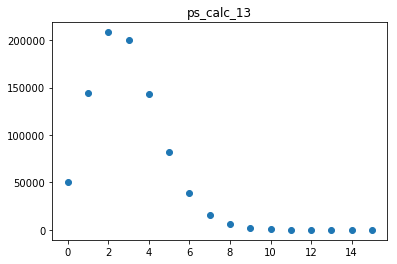

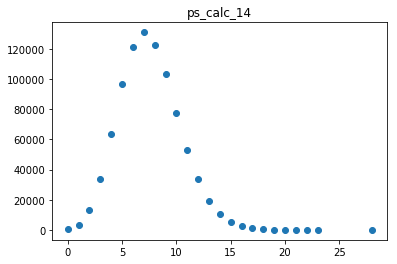

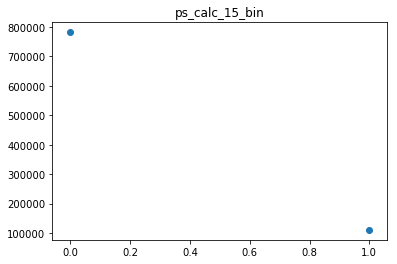

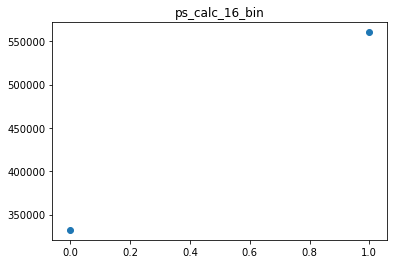

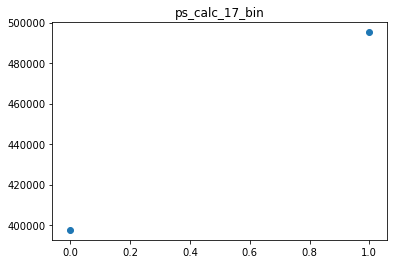

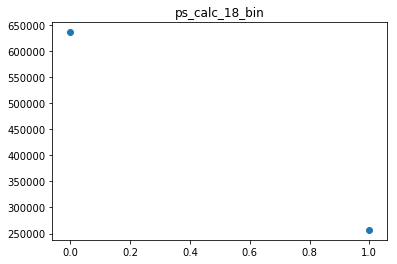

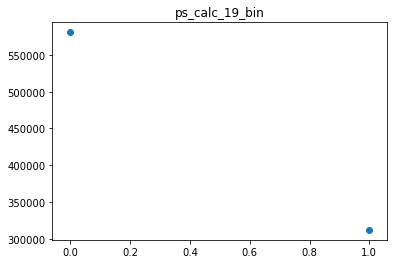

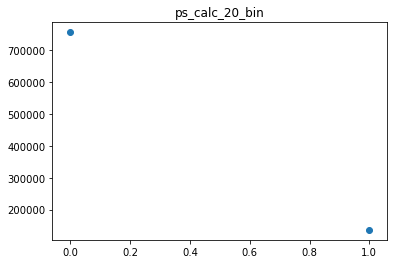

In [50]:
analyzeData('test.csv')